In [2]:
import os
import pandas as pd
from corrLib import readdata
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from myImageLib import dirrec
from shutil import copy

## 1 Manage the main log

Run the cell below to know what has or has not been done!

In [2]:
data_folder = '../Data'
log = pd.read_csv(os.path.join(data_folder, 'main_log.csv'), header=[0,1])
log#.head() # to see the whole table, comment out the .head()

params                                                              \
       Date                                     Subfolder  BC   MPP FPS   
0   7132021                          2021-07-13_17h17m24s  20  0.10  30   
1   7202021  1st-drop-tracking/2021-07-20_16h24m06s-mttry  32  0.10  30   
2   7202021     1st-drop-tracking/2021-07-20_16h25m35s-m2  32  0.10  30   
3   7202021     1st-drop-tracking/2021-07-20_16h27m01s-m3  32  0.10  30   
4   7202021     1st-drop-tracking/2021-07-20_16h28m21s-m4  32  0.10  30   
5   7202021     1st-drop-tracking/2021-07-20_16h29m43s-m5  32  0.10  30   
6   7202021        1st-drop-tracking/2021-07-20_16h31m06s  32  0.10  30   
7   7202021        1st-drop-tracking/2021-07-20_16h32m59s  32  0.10  30   
8   7202021        1st-drop-tracking/2021-07-20_16h34m28s  32  0.10  30   
9   7202021        1st-drop-tracking/2021-07-20_16h35m47s  32  0.10  30   
10  7202021        1st-drop-tracking/2021-07-20_16h42m46s  32  0.10  30   
11  7202021        1st-drop-tracking/2021-07-20_16h43m54s  32  0.10  30   
12  7202021        1st-drop-tracking/2021-07-20_16h44m58s  32  0.10  30   
13  7202021        1st-drop-tracking/2021-07-20_16h47m59s  32  0.10  30   
14  7202021        1st-drop-tracking/2021-07-20_16h50m22s  32  0.10  30   
15  7202021        1st-drop-tracking/2021-07-20_16h51m25s  32  0.10  30   
16  7212021                          2021-07-21_16h41m52s  23  0.16  30   
17  7212021                          2021-07-21_16h43m03s  23  0.16  30   
18  8042021                          2021-08-04_16h32m08s  24  0.10  30   
19  8042021                          2021-08-04_16h37m16s  24  0.10  30   
20  8122021                          2021-08-12_16h41m05s  23  0.10  30   
21  8122021                          2021-08-12_16h44m01s  23  0.10  30   
22  8122021                          2021-08-12_16h47m32s  23  0.10  30   
23  8122021                          2021-08-12_16h53m13s  23  0.10  30   
24  8132021                          2021-08-13_15h28m24s  24  0.10  30   
25  8132021                          2021-08-13_15h31m03s  24  0.10  30   
26  8132021                          2021-08-13_15h34m17s  24  0.10  30   
27  8132021                          2021-08-13_15h38m55s  24  0.10  30   
28  8132021                          2021-08-13_15h50m58s  24  0.10  30   
29  8132021                          2021-08-13_15h56m31s  24  0.10  30   
30  8132021                          2021-08-13_16h02m57s  24  0.10  30   
31  8132021                          2021-08-13_16h05m45s  24  0.10  30   
32  8132021                          2021-08-13_16h08m55s  24  0.10  30   
33  8132021                          2021-08-13_16h12m54s  24  0.10  30   
34  8132021                          2021-08-13_16h15m21s  24  0.10  30   
35  8132021                          2021-08-13_16h20m05s  24  0.10  30   
36  8132021                          2021-08-13_16h22m52s  24  0.10  30   
37  8132021                          2021-08-13_16h26m25s  24  0.10  30   
38  8132021                          2021-08-13_16h35m25s  24  0.10  30   

   analysis                                                      Visual  \
         ID     OD     a     b   c 2D-trajectory 3D-trajectory 2D-image   
0      34.5  100.5  45.4  49.0 NaN           1.0           1.0      1.0   
1       8.8   66.0  51.4  51.2 NaN           1.0           1.0      1.0   
2       9.0   69.5  51.3  52.0 NaN           1.0           1.0      1.0   
3       9.0   69.2  50.9  51.8 NaN           1.0           1.0      1.0   
4       9.1   69.3  51.2  51.2 NaN           1.0           1.0      1.0   
5       8.6   65.2  51.7  51.7 NaN           1.0           1.0      1.0   
6       8.9   65.5  51.7  51.0 NaN           1.0           1.0      1.0   
7       9.2   67.7  51.7  51.2 NaN           1.0           1.0      1.0   
8       8.7   67.6  51.5  51.3 NaN           1.0           1.0      1.0   
9       8.9   65.1  52.2  51.4 NaN           1.0           1.0      1.0   
10      8.4   71.7  51.8  51.

### Update the log

- frame rate from RawImageInfo.txt
- check the dropSize.xlsx for a, b, ID and OD
- check traj.csv and xyz-traj.csv for 2D and 3D trajectory
- check key visualization files
    - 2D-image: "2d-traj.jpg"
    - 3D-projection: "3d-traj-animation.avi"
    - 3D-outRef: "3d-traj-RVRef.avi"

In [14]:
img_folder = '/home/zhengyang/data/DE'

for num, i in log.iterrows():
    sf = os.path.join(img_folder, '{:08d}'.format(i[('params', 'Date')]), i[('params', 'Subfolder')])
    # RawImageInfo.txt
    imageInfo_dir = os.path.join(sf, 'RawImageInfo.txt')
    if os.path.exists(imageInfo_dir) == True:
        with open(imageInfo_dir, 'r') as f:
            fps = int(f.readline())
        log[('params', 'FPS')].at[num] = fps

    # dropSize.xlsx
    dropSize_dir = os.path.join(sf, 'dropSize.xlsx')
    if os.path.exists(dropSize_dir) == True:
        
        outer, inner, a, b = read_dropSize(dropSize_dir)
        log[('analysis', 'OD')].at[num] = outer
        log[('analysis', 'ID')].at[num] = inner
        log[('analysis', 'a')].at[num] = a
        log[('analysis', 'b')].at[num] = b
    
    # traj.csv
    traj_dir = os.path.join(sf, 'crop_HoughCircles', 'traj.csv')
    log[('analysis', '2D-trajectory')].at[num] = int(os.path.exists(traj_dir))
    # xyz-traj.csv
    xyz_dir = os.path.join(sf, 'crop_HoughCircles', 'xyz-traj.csv')
    log[('analysis', '3D-trajectory')].at[num] = int(os.path.exists(xyz_dir))
    # 2d-image.jpg
    image_2D_dir = os.path.join(sf, 'crop_HoughCircles', '2d-image.jpg')
    log[('Visual', '2D-image')].at[num] = int(os.path.exists(image_2D_dir))
    # 3d-traj-animation.avi
    projection_3D_dir = os.path.join(sf, 'crop_HoughCircles', '3d-traj-animation.avi')
    log[('Visual', '3D-projection')].at[num] = int(os.path.exists(projection_3D_dir))
    # 3d-traj-RVRef.avi
    outRef_3D_dir = os.path.join(sf, 'crop_HoughCircles', '3d-traj-RVRef.avi')
    log[('Visual', '3D-outRef')].at[num] = int(os.path.exists(outRef_3D_dir))    

In [15]:
log

params                                                              \
       Date                                     Subfolder  BC   MPP FPS   
0   7132021                          2021-07-13_17h17m24s  20  0.10  30   
1   7202021  1st-drop-tracking/2021-07-20_16h24m06s-mttry  32  0.10  30   
2   7202021     1st-drop-tracking/2021-07-20_16h25m35s-m2  32  0.10  30   
3   7202021     1st-drop-tracking/2021-07-20_16h27m01s-m3  32  0.10  30   
4   7202021     1st-drop-tracking/2021-07-20_16h28m21s-m4  32  0.10  30   
5   7202021     1st-drop-tracking/2021-07-20_16h29m43s-m5  32  0.10  30   
6   7202021        1st-drop-tracking/2021-07-20_16h31m06s  32  0.10  30   
7   7202021        1st-drop-tracking/2021-07-20_16h32m59s  32  0.10  30   
8   7202021        1st-drop-tracking/2021-07-20_16h34m28s  32  0.10  30   
9   7202021        1st-drop-tracking/2021-07-20_16h35m47s  32  0.10  30   
10  7202021        1st-drop-tracking/2021-07-20_16h42m46s  32  0.10  30   
11  7202021        1st-drop-tracking/2021-07-20_16h43m54s  32  0.10  30   
12  7202021        1st-drop-tracking/2021-07-20_16h44m58s  32  0.10  30   
13  7202021        1st-drop-tracking/2021-07-20_16h47m59s  32  0.10  30   
14  7202021        1st-drop-tracking/2021-07-20_16h50m22s  32  0.10  30   
15  7202021        1st-drop-tracking/2021-07-20_16h51m25s  32  0.10  30   
16  7212021                          2021-07-21_16h41m52s  23  0.16  30   
17  7212021                          2021-07-21_16h43m03s  23  0.16  30   
18  8042021                          2021-08-04_16h32m08s  24  0.10  30   
19  8042021                          2021-08-04_16h37m16s  24  0.10  30   
20  8122021                          2021-08-12_16h41m05s  23  0.10  30   
21  8122021                          2021-08-12_16h44m01s  23  0.10  30   
22  8122021                          2021-08-12_16h47m32s  23  0.10  30   
23  8122021                          2021-08-12_16h53m13s  23  0.10  30   
24  8132021                          2021-08-13_15h28m24s  24  0.10  30   
25  8132021                          2021-08-13_15h31m03s  24  0.10  30   
26  8132021                          2021-08-13_15h34m17s  24  0.10  30   
27  8132021                          2021-08-13_15h38m55s  24  0.10  30   
28  8132021                          2021-08-13_15h50m58s  24  0.10  30   
29  8132021                          2021-08-13_15h56m31s  24  0.10  30   
30  8132021                          2021-08-13_16h02m57s  24  0.10  30   
31  8132021                          2021-08-13_16h05m45s  24  0.10  30   
32  8132021                          2021-08-13_16h08m55s  24  0.10  30   
33  8132021                          2021-08-13_16h12m54s  24  0.10  30   
34  8132021                          2021-08-13_16h15m21s  24  0.10  30   
35  8132021                          2021-08-13_16h20m05s  24  0.10  30   
36  8132021                          2021-08-13_16h22m52s  24  0.10  30   
37  8132021                          2021-08-13_16h26m25s  24  0.10  30   
38  8132021                          2021-08-13_16h35m25s  24  0.10  30   

   analysis                                                      Visual  \
         ID     OD     a     b   c 2D-trajectory 3D-trajectory 2D-image   
0      34.5  100.5  45.4  49.0 NaN           1.0           1.0      1.0   
1       8.8   66.0  51.4  51.2 NaN           1.0           1.0      1.0   
2       9.0   69.5  51.3  52.0 NaN           1.0           1.0      1.0   
3       9.0   69.2  50.9  51.8 NaN           1.0           1.0      1.0   
4       9.1   69.3  51.2  51.2 NaN           1.0           1.0      1.0   
5       8.6   65.2  51.7  51.7 NaN           1.0           1.0      1.0   
6       8.9   65.5  51.7  51.0 NaN           1.0           1.0      1.0   
7       9.2   67.7  51.7  51.2 NaN           1.0           1.0      1.0   
8       8.7   67.6  51.5  51.3 NaN           1.0           1.0      1.0   
9       8.9   65.1  52.2  51.4 NaN           1.0           1.0      1.0   
10      8.4   71.7  51.8  51.

### Save the log

In [28]:
log.to_csv(os.path.join(data_folder, 'main_log.csv'), index=False)

### Add entries to log

In [5]:
folder = '/home/zhengyang/data/DE/08122021'
l = readdata(folder, 'raw').sort_values(by='Dir')
for num, i in l.iterrows():
    print(os.path.relpath(os.path.split(i.Dir)[0], folder))
# copy to the csv spreadsheet

2021-08-12_16h32m19s
2021-08-12_16h37m10s
2021-08-12_16h41m05s
2021-08-12_16h44m01s
2021-08-12_16h47m32s
2021-08-12_16h53m13s


## 2 Experiment overview

Plot parameter distributions (histogram) to have a broad idea of what experiment is lacking.

Text(0, 0.5, 'Histogram')

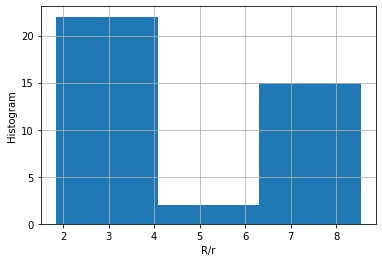

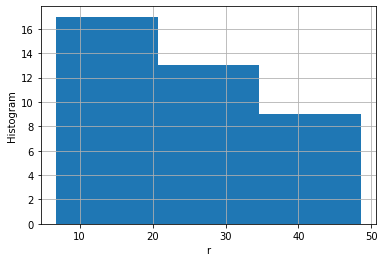

In [11]:
data_folder = '../Data'
log = pd.read_csv(os.path.join(data_folder, 'main_log.csv'), header=[0,1])
r = log[('analysis', 'OD')] / log[('analysis', 'ID')]
plt.figure()
r.hist(bins=3)
plt.ylabel("Histogram")
plt.xlabel("R/r")
plt.figure()
log[('analysis', 'ID')].hist(bins=3)
plt.xlabel('r')
plt.ylabel('Histogram')

## 3 A Class for quickly accessing log entries

In [8]:
class DE_log(pd.DataFrame):
    def __init__(self, log=log):
        '''log_data is a DataFrame containing the experiment log
        '''
        self.main_log = log
    def size_ratio(self, ratio_range):
        assert(len(ratio_range)==2)
        ratio = self.main_log[('params', 'OD')] / self.main_log[('params', 'ID')]
        return self.main_log.loc[(ratio>=ratio_range[0])&(ratio<ratio_range[1])]

In [6]:
log = pd.read_csv(os.path.join('../Data', 'main_log.csv'), header=[0, 1])

## 4 Structured log for XZ experiments

After each day of experiment, the raw experiment log (written during experiments) will be reorganized into a structured log in .xlsx format. For XZ experiments, a typical structured log looks like the following:
![](img/structured_log_screenshot.png)

In this section, these logs are read and a statistics of the parameters are visualized. 

In [4]:
def read_structured_log_XZ(folder, append_date=True):
    """Read .xlsx files in given folder starting with `structured_log_` and concatenate them into a single table.
    Args:
    folder -- the folder containing the structured logs
    append_date -- add the experiment date as a column of the log. This is useful when trying to locate specific data
    Returns:
    df -- a single DataFrame of all logs
    Test:
    >>>folder = '/home/zhengyang/data/DE/Logs'
    >>>read_structured_log_XZ(folder, append_date=True)"""
    l = dirrec(folder, 'structured_log_*')
    df_list = []
    for Dir in l:
        df_temp = pd.read_excel(Dir)
        if append_date:
            date_str = os.path.splitext(os.path.split(Dir)[-1])[0].split('_')[-1]
            df_temp = df_temp.assign(date=date_str)
        df_list.append(df_temp)
    df = pd.concat(df_list)
    return df

In [6]:
folder = '../Data/structured_log'
df = read_structured_log_XZ(folder, append_date=True)

In [7]:
# mainly for filtering the anchor videos
df = df.loc[df['Plane']=='XZ']
df = df.loc[df['Quality']!='Bad']

Text(0, 0.5, 'Number of experiments')

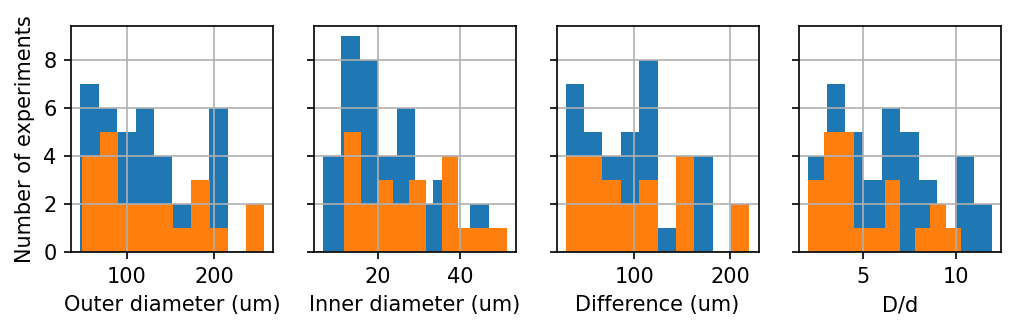

In [8]:
fig, ax = plt.subplots(figsize=(8, 2), dpi=150, nrows=1, ncols=4, sharey=True)
df['D'].hist(ax=ax[0])
df['D'].loc[df['Easy to analyze?']=='Yes'].hist(ax=ax[0])
df['d'].hist(ax=ax[1])
df['d'].loc[df['Easy to analyze?']=='Yes'].hist(ax=ax[1])
(df['D']-df['d']).hist(ax=ax[2])
(df['D']-df['d']).loc[df['Easy to analyze?']=='Yes'].hist(ax=ax[2])
(df['D']/df['d']).hist(ax=ax[3])
(df['D']/df['d']).loc[df['Easy to analyze?']=='Yes'].hist(ax=ax[3])
ax[0].set_xlabel('Outer diameter (um)')
ax[1].set_xlabel('Inner diameter (um)')
ax[2].set_xlabel('Difference (um)')
ax[3].set_xlabel('D/d')
ax[0].set_ylabel('Number of experiments')

Practically, it's easier to put data into fixed brackets and visualize the distribution of the parameters. In the XZ experiments, we have 3 major parameters: D, d and OD. Below I set a tentative bracket for all the parameters:
```
OD_bracket = ((0, 25), (25, 50), (50, 75), (75, 100), (100, 125), (125, 150))
D_bracket = ((0, 50), (50, 100), (100, 150), (150, 200))
d_bracket = ((0, 20), (20, 40), (40, 60))
```
OD will be considered as a parameter that is fixed for now (11/18/2021). We will examine the effect of D and d. Concentration effect will be addressed later when more data are available.

Text(0, 0.5, 'Number of experiments')

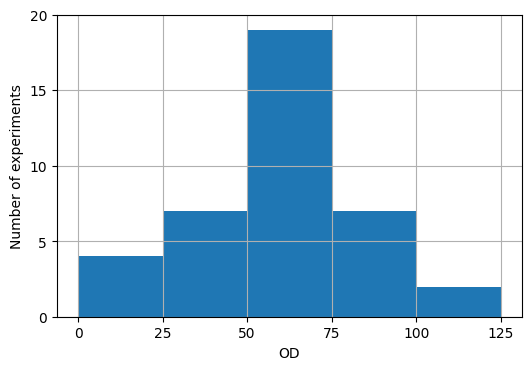

In [18]:
# distribution of OD
fig, ax = plt.subplots(dpi=100)
df['OD'].hist(bins=range(0, 150, 25), ax=ax)
ax.set_xticks(range(0, 150, 25))
ax.set_xticklabels(range(0, 150, 25))
ax.set_yticks(range(0,21,5))
ax.set_yticklabels(range(0, 21, 5))
ax.set_xlabel('OD')
ax.set_ylabel('Number of experiments')

[Text(2.0517799352750807, 0, '2'),
 Text(4.197925860547219, 0, '4'),
 Text(6.344071785819358, 0, '6'),
 Text(8.490217711091496, 0, '8'),
 Text(10.636363636363635, 0, '10')]

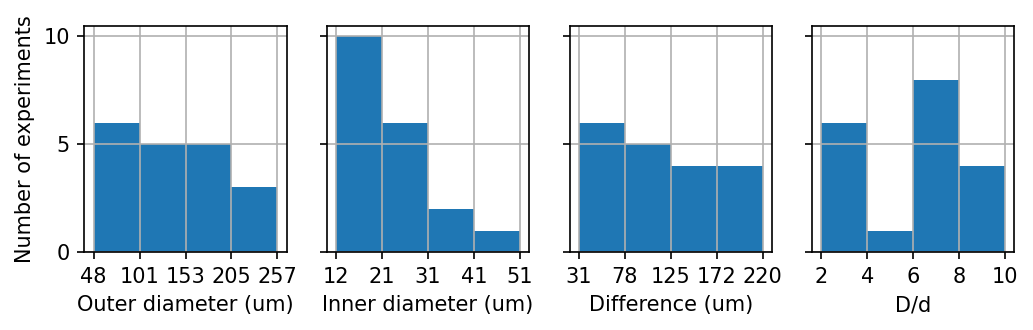

In [27]:
# Take the middle column (50, 75), 26 experiment, to study the effect of D and d
nbins = 4 # number of bins
subdf = df.loc[(df['OD']>=50)&(df['OD']<75)]
fig, ax = plt.subplots(figsize=(8, 2), dpi=150, nrows=1, ncols=4, sharey=True)
subdf['D'].hist(ax=ax[0], bins=nbins)
# subdf['D'].loc[subdf['Easy to analyze?']=='Yes'].hist(ax=ax[0])
subdf['d'].hist(ax=ax[1], bins=nbins)
# subdf['d'].loc[subdf['Easy to analyze?']=='Yes'].hist(ax=ax[1])
(subdf['D']-subdf['d']).hist(ax=ax[2], bins=nbins)
# (df['D']-df['d']).loc[df['Easy to analyze?']=='Yes'].hist(ax=ax[2])
(subdf['D']/subdf['d']).hist(ax=ax[3], bins=nbins)
# (df['D']/df['d']).loc[df['Easy to analyze?']=='Yes'].hist(ax=ax[3])
ax[0].set_xlabel('Outer diameter (um)')
ax[1].set_xlabel('Inner diameter (um)')
ax[2].set_xlabel('Difference (um)')
ax[3].set_xlabel('D/d')
ax[0].set_ylabel('Number of experiments')
ax[0].set_yticks([0, 5, 10])
ax[0].set_yticklabels([0, 5, 10])
ax[0].set_xticks(np.linspace(subdf['D'].min(), subdf['D'].max(), 5))
ax[0].set_xticklabels(np.linspace(subdf['D'].min(), subdf['D'].max(), 5).astype('int'))
ax[1].set_xticks(np.linspace(subdf['d'].min(), subdf['d'].max(), 5))
ax[1].set_xticklabels(np.linspace(subdf['d'].min(), subdf['d'].max(), 5).astype('int'))
ax[2].set_xticks(np.linspace((subdf['D']-subdf['d']).min(), (subdf['D']-subdf['d']).max(), 5))
ax[2].set_xticklabels(np.linspace((subdf['D']-subdf['d']).min(), (subdf['D']-subdf['d']).max(), 5).astype('int'))
ax[3].set_xticks(np.linspace((subdf['D']/subdf['d']).min(), (subdf['D']/subdf['d']).max(), 5))
ax[3].set_xticklabels(np.linspace((subdf['D']/subdf['d']).min(), (subdf['D']/subdf['d']).max(), 5).astype('int'))

In [9]:
subdf

,#,OD,D,d,MMP,FPS,Easy to analyze?,Plane,Comment,date,Quality
3,3,70.0,127.5,12.3,0.33,50.0,No,XZ,NaN,10272021,NaN
11,11,65.0,48.9,17.0,0.11,50.0,Yes,XZ,NaN,10262021,NaN
12,12,65.0,74.0,15.4,0.11,50.0,Yes,XZ,small inner drop,10262021,NaN
13,13,65.0,63.4,30.9,0.11,50.0,Yes,XZ,large inner drop,10262021,NaN
15,15,70.0,100.0,25.7,0.11,50.0,Yes,XZ,outer size increasing,10262021,NaN
16,16,70.0,120.7,18.9,0.11,50.0,No,XZ,"outer size increasing, too many drops in a sam...",10262021,NaN
5,5,51.0,140.0,20.0,0.33,50.0,NaN,XZ,"very large outer drop 140/20, have to use 20x ...",11022021,NaN
13,13,61.0,201.2,51.4,0.65,50.0,Yes,XZ,NaN,11022021,NaN
16,16,65.0,100.0,30.0,0.11,50.0,Yes,XZ,Big droplet increasing size,11022021,NaN
17,17,65.0,179.1,28.0,0.33,50.0,Yes,XZ,big outer droplet,11022021,NaN


In [10]:
subdf.to_csv("OD50-75.csv")

In [ ]:
# copy data from raw folder to summary folder
# rename data file by adding date and number at the end
files_to_copy = ['traj_50.csv']
data_folder = '/media/zhengyang/NothingToSay/DE'
dest_folder = '../Data/Real_data'
unsuccessful_list = []
for num, i in subdf.iterrows():
    date_str = '{:08d}'.format(int(i.date))
    num_str = '{:02d}'.format(i['#'])
    for file in files_to_copy:
        file_dir = os.path.join(data_folder, date_str, 'Analysis', num_str, file)
        root, ext = os.path.splitext(file)
        if os.path.exists(file_dir):
            copy(file_dir, os.path.join(dest_folder, '{0}_{1}_{2}{3}'.format(root, date_str, num_str, ext)))
        else:
            unsuccessful_list.append(file_dir)
if len(unsuccessful_list) == 0:
    print("Data transfer complete.")
else:
    print("The following files are not successfully copied:")
    for item in unsuccessful_list:
        print(item)